In [22]:
import scipy.io as sio

def load_image(path):
    """Load the image and display it 

    Parameters
    ----------
    path : string
        path to the file

    Returns
    -------
    nothing
    displays figure
    """
    Im = sio.loadmat(path)
    return Im

In [24]:
path = '2dpeakfinder/data/brain.mat'
Im = load_image(path)
Im = Im['Im']

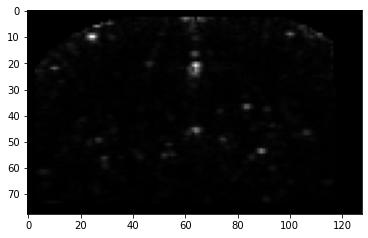

In [25]:
import matplotlib.pyplot as plt

plt.imshow(Im, cmap = 'gray')


In [33]:
import numpy as np
np.argmax(Im)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

(array([ 3,  3,  3, ..., 73, 73, 73]),
 array([ 38,  39,  40, ..., 105, 106, 112]))

In [51]:
from skimage.feature import peak_local_max

xy = peak_local_max(Im, min_distance=1,threshold_abs=250)


In [43]:
xy.shape

(48, 2)

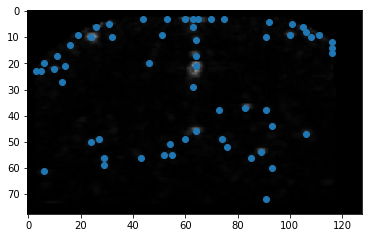

In [52]:
fig, axes = plt.subplots()
axes.imshow(Im, cmap = 'gray')
axes.scatter(xy[:,1],xy[:,0])